In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def f(W,x,layers):
    a=x
    for l in range(layers-1):
        w = W[l];
        #print(w.shape)
        a = sigmoid(np.matmul(np.transpose(w),a))
    #print('a value before last layer:',a)
    a = sigmoid(W[layers-1,0,0]*a[0]+W[layers-1,1,0]*a[1])
    #print('a value after last layer:',a)
    return a;

def error_func(y,y_hat):
    return y*np.log(y_hat)+(1-y)*np.log(1-y_hat)

def CEO(nj_list,tau,mean,sigma,layers,X,Y,rho):
    complete_weights = np.ones((tau,1,layers,2,2))
    error_vals=[];
    for i in tqdm(range(tau)):
        W = np.ones((nj_list[i],layers,2,2))*0.5
        W[:,-1,:,-1] = 0
        objective_function_list = np.zeros(nj_list[i])
        for j in range(nj_list[i]):
            for l in range(layers):
                w11,w12 = np.random.normal(mean[l][0],sigma[l][0],2)
                w21,w22 = np.random.normal(mean[l][1],sigma[l][0],2)
                W[j][l][0] = np.array([w11,w12])
                W[j][l][1] = np.array([w21,w22])
            W[:,-1,:,-1] = 0
            error = 0
            #print(X,Y)
            for x,y in zip(X,Y):
                a = f(W[j],x,layers)
                error = error + np.abs(error_func(y,a))
            objective_function_list[j] = error
        #print('Objective function list:',objective_function_list)
        #complete_weights[i] = W
        considered_indices = np.argsort(objective_function_list)
        mean_error = np.mean(objective_function_list[considered_indices[:int(rho*nj_list[i])]])
        error_vals.append(mean_error)
        for l in range(layers-1):
            mean[l] = np.mean(np.mean(W[considered_indices[:int(rho*nj_list[i])],l],0),1)#np.mean(W[considered_indices[:int(rho*nj_list[i])],l,0])
        # print(mean.shape)
        mean[-1][0] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[0][0]
        mean[-1][1] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[1][0]
        
    return mean,error_vals
X = np.array([[1,1],[1,2]])
y = np.array([[1],[0]])
list_of_tau = [100,150,190,80,50,150,200,300,80,70]
mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

100%|██████████| 10/10 [00:00<00:00, 81.26it/s]


[1.399633316495609, 1.3960862428233818, 1.39332778638088, 1.4006324357682842, 1.382827845485375, 1.3869097387823432, 1.3924070563087496, 1.3945923691969604, 1.391516392301719, 1.3901492790805714]


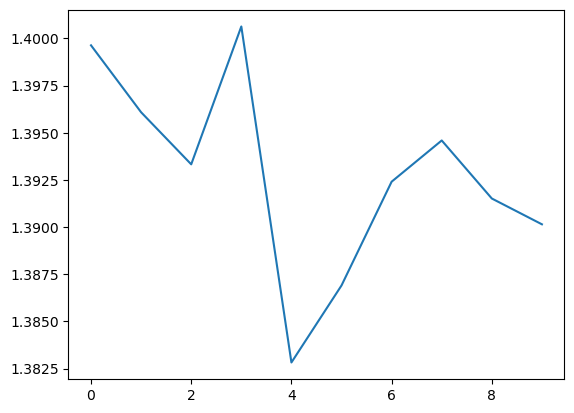

In [3]:
print(error_vals)
from matplotlib import pyplot as plt
plt.plot(error_vals)

100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

[82.41277563827413, 84.71427765471955, 82.4969054074565, 79.79219899087447, 80.24407816903646, 83.57778543025348, 80.37295816322175, 80.88796576166283, 80.54164892482049, 83.88799136817128]


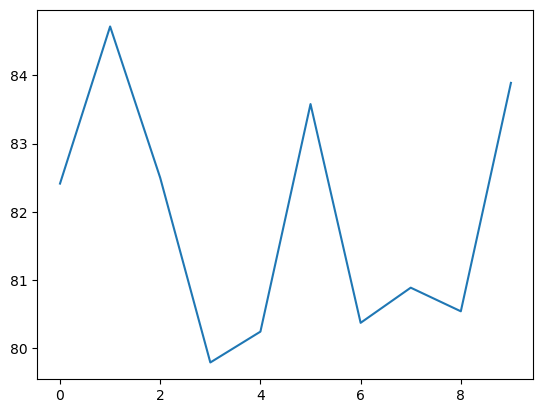

In [6]:
df = pd.read_csv('./iris/reduced_iris.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

y = np.array([[i] for i in y])

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

print(error_vals)
plt.plot(error_vals)

In [7]:
X

array([[ 8.0849532 ,  0.32845422],
       [ 7.1471629 , -0.75547326],
       [ 7.51137789, -0.23807832],
       [ 6.83767561, -0.64288476],
       [ 8.15781367,  0.54063935],
       [ 7.72363087,  1.48232345],
       [ 7.23514662,  0.3771537 ],
       [ 7.62974497,  0.01667246],
       [ 6.58274132, -0.98737424],
       [ 7.36884116, -0.91362729],
       [ 8.42181434,  0.67622968],
       [ 7.24739722, -0.08292417],
       [ 7.35062105, -1.03935969],
       [ 7.59646896, -0.77671554],
       [ 9.86936588,  1.61486093],
       [ 9.18033614,  2.75558626],
       [ 8.59760709,  1.85442217],
       [ 7.7995682 ,  0.60905468],
       [ 8.1000091 ,  0.99610981],
       [ 8.04543611,  1.16244332],
       [ 7.52046427, -0.156233  ],
       [ 7.60526378,  1.22757267],
       [ 8.70408249,  0.89959416],
       [ 6.26374139,  0.46023935],
       [ 6.59191505, -0.36199821],
       [ 6.79210164, -0.93823664],
       [ 6.84048091,  0.4848487 ],
       [ 7.948386  ,  0.23871551],
       [ 8.01209273,

100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

[81.69809292263771, 85.20293074996182, 81.97506355558667, 80.76998254567268, 90.09385892397272, 81.8419852133379, 82.62511976759342, 80.81511498441178, 77.05700254989748, 77.79781619868706]


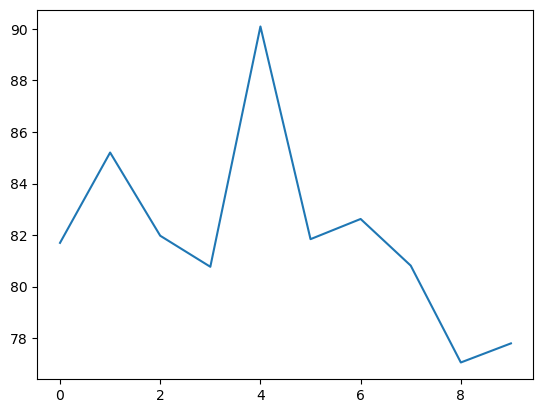

In [8]:
df = pd.read_csv('./iris/reduced_iris.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.array([[i] for i in y])

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

print(error_vals)
plt.plot(error_vals)

In [9]:
X

array([[ 1.41587624,  0.29354182],
       [ 1.25164585, -0.67517171],
       [ 1.31542895, -0.21277225],
       [ 1.19744694, -0.57455059],
       [ 1.42863592,  0.48317315],
       [ 1.35259972,  1.32476279],
       [ 1.26705399,  0.33706489],
       [ 1.33615797,  0.01490029],
       [ 1.15280161, -0.88242324],
       [ 1.29046723, -0.81651508],
       [ 1.474869  ,  0.60435117],
       [ 1.26919937, -0.07410991],
       [ 1.28727643, -0.928883  ],
       [ 1.33033051, -0.69415608],
       [ 1.72837125,  1.44321246],
       [ 1.60770502,  2.46268664],
       [ 1.50565468,  1.65731001],
       [ 1.36589823,  0.54431641],
       [ 1.4185129 ,  0.89023028],
       [ 1.40895582,  1.03888369],
       [ 1.3170202 , -0.13962652],
       [ 1.3318707 ,  1.09709025],
       [ 1.52430117,  0.80397357],
       [ 1.09693679,  0.41131911],
       [ 1.15440815, -0.32352032],
       [ 1.1894658 , -0.83850862],
       [ 1.19793821,  0.43331266],
       [ 1.39195993,  0.21334172],
       [ 1.40311656,

  0%|          | 0/10 [00:00<?, ?it/s]/var/folders/wx/m13c2nmx72n4d9ng8bz_kn340000gn/T/ipykernel_7861/3382553690.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))
100%|██████████| 10/10 [06:51<00:00, 41.11s/it]

[7526.008104982678, 4943.917758658291, 3920.5881535808157, 3668.2226560600393, 3588.606427511542, 3581.57076669708, 3518.6011642518224, 3488.654448408998, 3410.8517478906747, 3364.9966417378496]


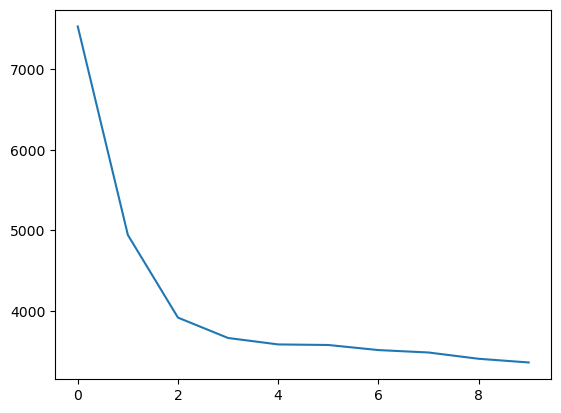

In [70]:
df = pd.read_csv('./pulsar/Pulsar_reduced.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

y = np.array([[i] for i in y])

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

print(error_vals)
plt.plot(error_vals)

In [11]:
df = pd.read_csv('./pulsar/Pulsar_reduced.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.array([[i] for i in y])

list_of_tau = [2000,1800,1600,1400,1200,1000,800,600,400,200]

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

# print(error_vals)
plt.plot(error_vals)

  0%|          | 0/10 [00:00<?, ?it/s]

 20%|██        | 2/10 [25:55<1:43:41, 777.71s/it]


KeyboardInterrupt: 